## Data preparation

The Detectron2 that we use accepts the Coco format data as the input. In this notebook I'll show you how to prepare our data which is generated from labelme. Given images in png format and the corresponding annotations in json format as structured in folder "data_all", we will convert it into the Coco format.

We start by importing common necesary packages:

In [1]:
import os
import cv2

from matplotlib import pyplot as plt
from utils import *

And see how does one of our data looks like:

Original image


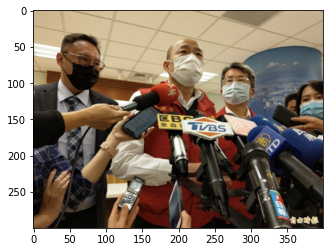

In [2]:
img = cv2.imread("data_all/maksssksksss103.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print ("Original image")

Now we want to split the data into 80% for training and 20% for validation:

In [3]:
input_folder = "data_all"
output_folder = "data_split"
train_size = 0.8

In [4]:
splitdata(input_folder, output_folder, train_size)

Copied 27 images to data_split/train
Copied 10 images to data_split/validation


Given two labels, generate labels.txt:

In [5]:
labels = ["mask", "nomask"]

In [6]:
genlabels(labels)

Convert the labelme to coco format:

In [7]:
os.system("python labelme2coco.py data_split/train train_dataset_coco --labels labels.txt;")
os.system("python labelme2coco.py data_split/validation val_dataset_coco --labels labels.txt;")

0

This process is optional. Sometimes, i.e. working on Google colab, I need the file to be archived to reduce the size. Thus, this is how to compress the directory:

In [8]:
train_dir = "train_dataset_coco"
train_zip = "train"
val_dir = "val_dataset_coco"
val_zip = "val"

In [ ]:
compress(train_dir, train_zip)
compress(val_dir, val_zip)

#### We're all set. Let's jump into the train_detectron_2.ipynb